In [2]:
options(warn=-1)
library(primer)
data(sparrows)

Usually wildlife models need take into consideration the count or density of the population in a given area. This is because there are external factors that limit the growth of the population infinitely without any boundaries. In other words, the per capita growth is correlated with the population density. The models are either showing positive or negative correlation between density and per capita growth.

### Discrete density dependent growth

Starting with the density independent growth model we have:

$N_{t+1} = \lambda N_{t} <=> N_{t+1} = (1 + r_{d})N_{t}$

$N_{t+1} = N_{t} + r_{d}N_{t}$ (Current population is equal to previous population count plus the per capita growth multiplied by previous population count.)

In order to add dependence between the population count and the growth, we can add a scaling factor. The scaling factor should be a value between $[0, 1]$ that will be 1 when the population size is 0 and 0 when the population reached the maximum limit in a particular area. 

$N_{t+1} = N_{t} + r_{d}(1-\alpha N_{t})N_{t}$
For this example, the population size is maximum $\frac{1}{\alpha}$, in which case, the scaling factor is 0 and the population will not grow. 

Alternatively, this can be written using a constant called _carrying capacity_ K: 
$N_{t+1} = N_{t} + r_{d}(1-\frac{N_{t}}{K})N_{t}$. In this case, the maximum population count is K, at which the scaling factor will be 0.

The model above is called _discrete logistic growth_.

In [7]:
dlogistic = function (N0, rd, K, t) {
    N = numeric(t + 1)
    N[1] = N0
    for(i in 1:t) {
        N[i+1] = N[i] + rd*(1 - N[i]/K) * N[i]
    }
    
    return(N)
}

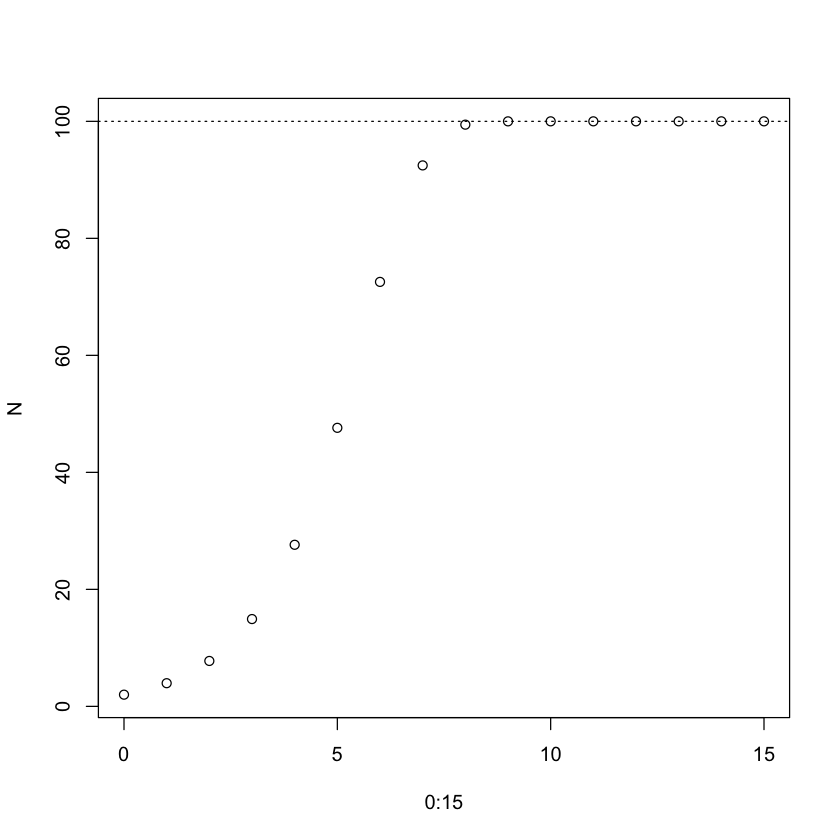

In [12]:
t = 15
N = dlogistic(2, 1, 100, t)
plot(0:15, N)
abline(h=100, lty=3)

### How does the growth changes over time ?

First, the increment growth $\Delta N = N_{t+1} - N_{t}$ the equation is a quadratic one, given the fact that we have $N_{t}^2$. The per capita growth ($\Delta N/N_{t}$) will be linear, given the fact that we will remove one $N_{t}$ in the denominator, so the equation will be the equation of a line with $N_{t}$ as the intercept. 

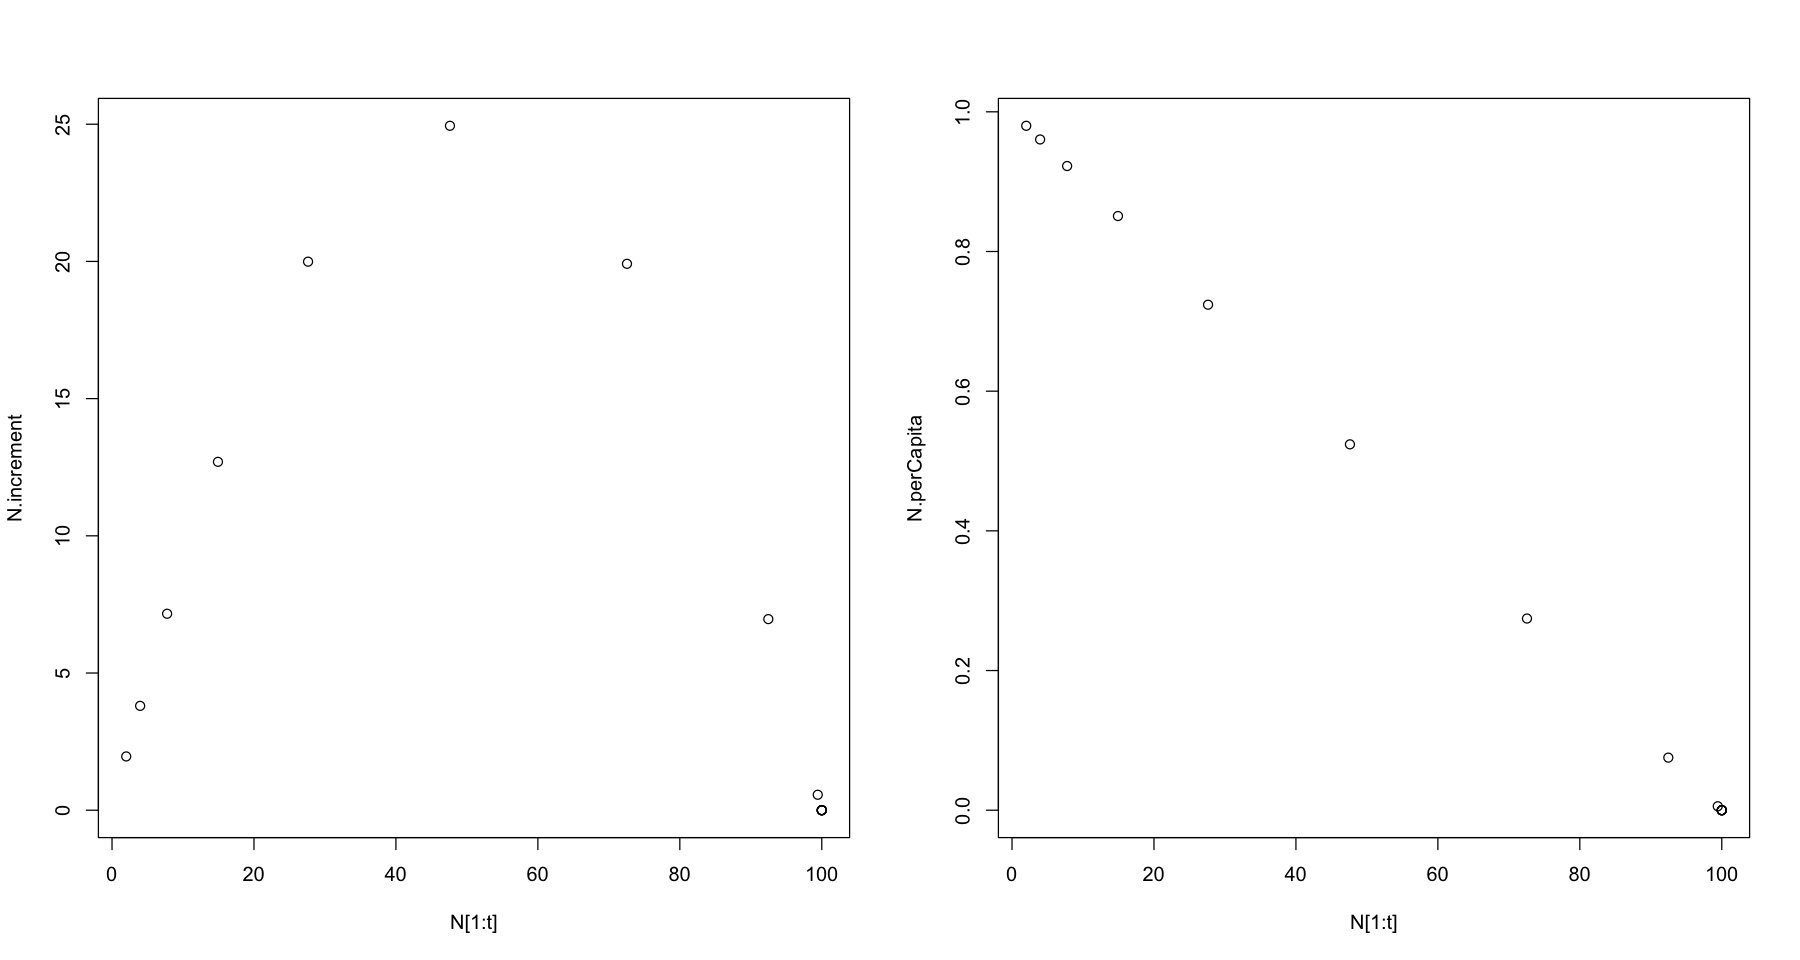

In [16]:
options(repr.plot.width=15, repr.plot.height=8)
N.increment = N[1:t+1] - N[0:t]
N.perCapita = N.increment/N[1:t]
par(mfrow=c(1,2))
plot(N[1:t], N.increment)
plot(N[1:t], N.perCapita)

### Initial population size change 
The population will always converge to K regardless of what value does $N_{0}$ have. The difference between values is that higher values will converge faster while the lower values will require more iteration to get to K (attractor). 

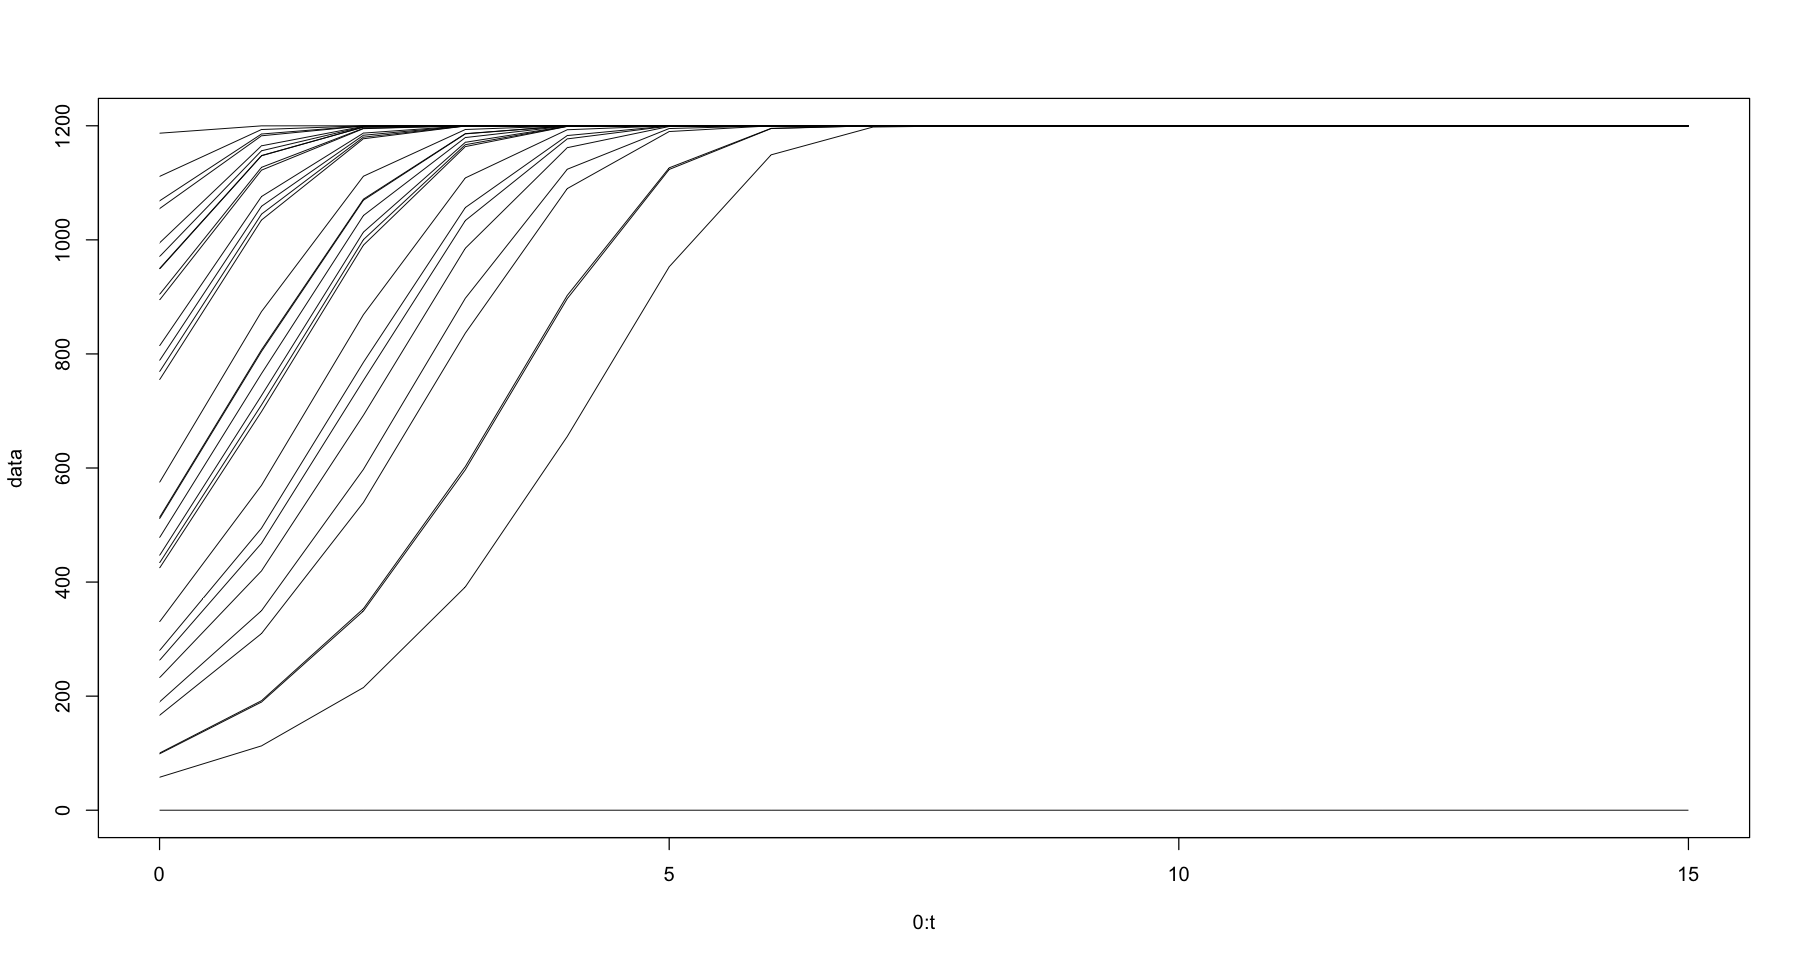

In [19]:
N0s <- c(0, runif(30, 0, 1200))
data = sapply(N0s, function(n) {
    return (dlogistic(n, 1, 1200, 15))
})
matplot(0:t, data, type = "l", lty = 1, lwd = 0.75, col = 1)

### Change in K

Higher the value for K, the growth is more steep in the beginning (since the scaling factor is $1 - \frac{1}{K}N_{t}$ - higher the value for K we divide by a bigger quantity.)

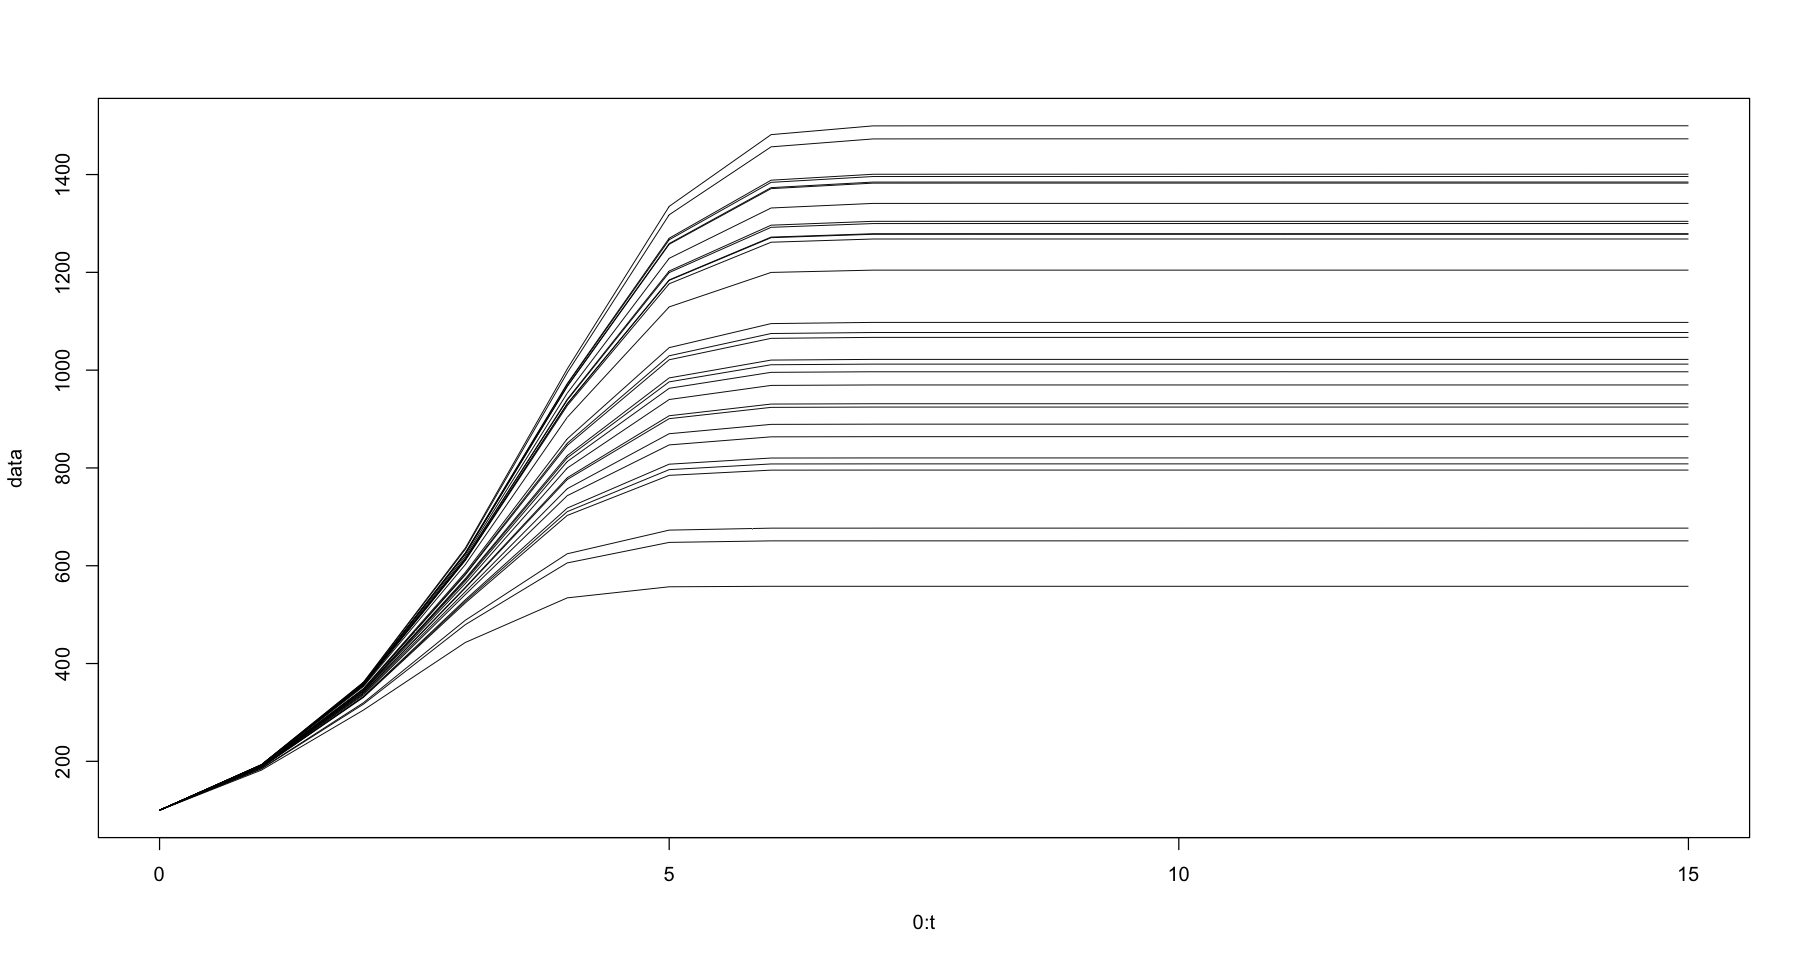

In [21]:
Ks = c(0, runif(30, 500, 1500))
data = sapply(Ks, function(k) {
    return (dlogistic(100, 1, k, 15))
})
matplot(0:t, data, type = "l", lty = 1, lwd = 0.75, col = 1)

### Change in $r_{d}$

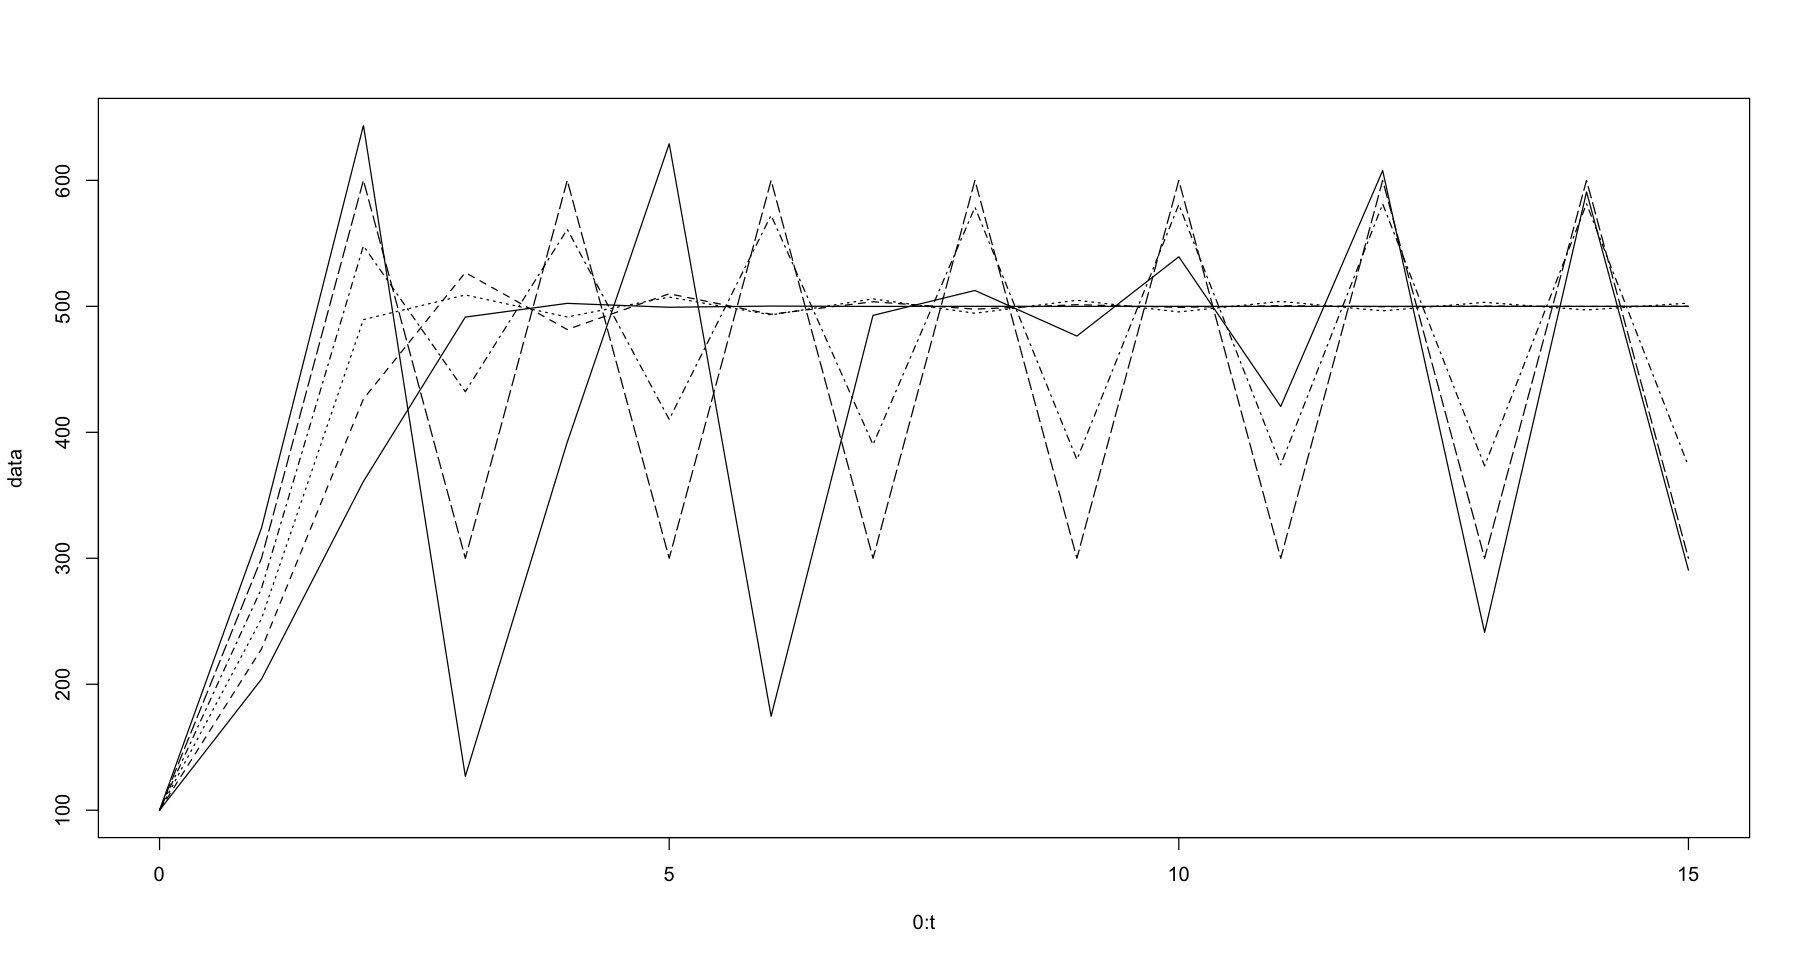

In [24]:
rds <- seq(1.3, 2.8, by = 0.3)
data = data.frame(sapply(rds, function(rd) {
    return (dlogistic(100, rd, 500, 15))
}))

matplot(0:t, data, type = "l", col = 1)

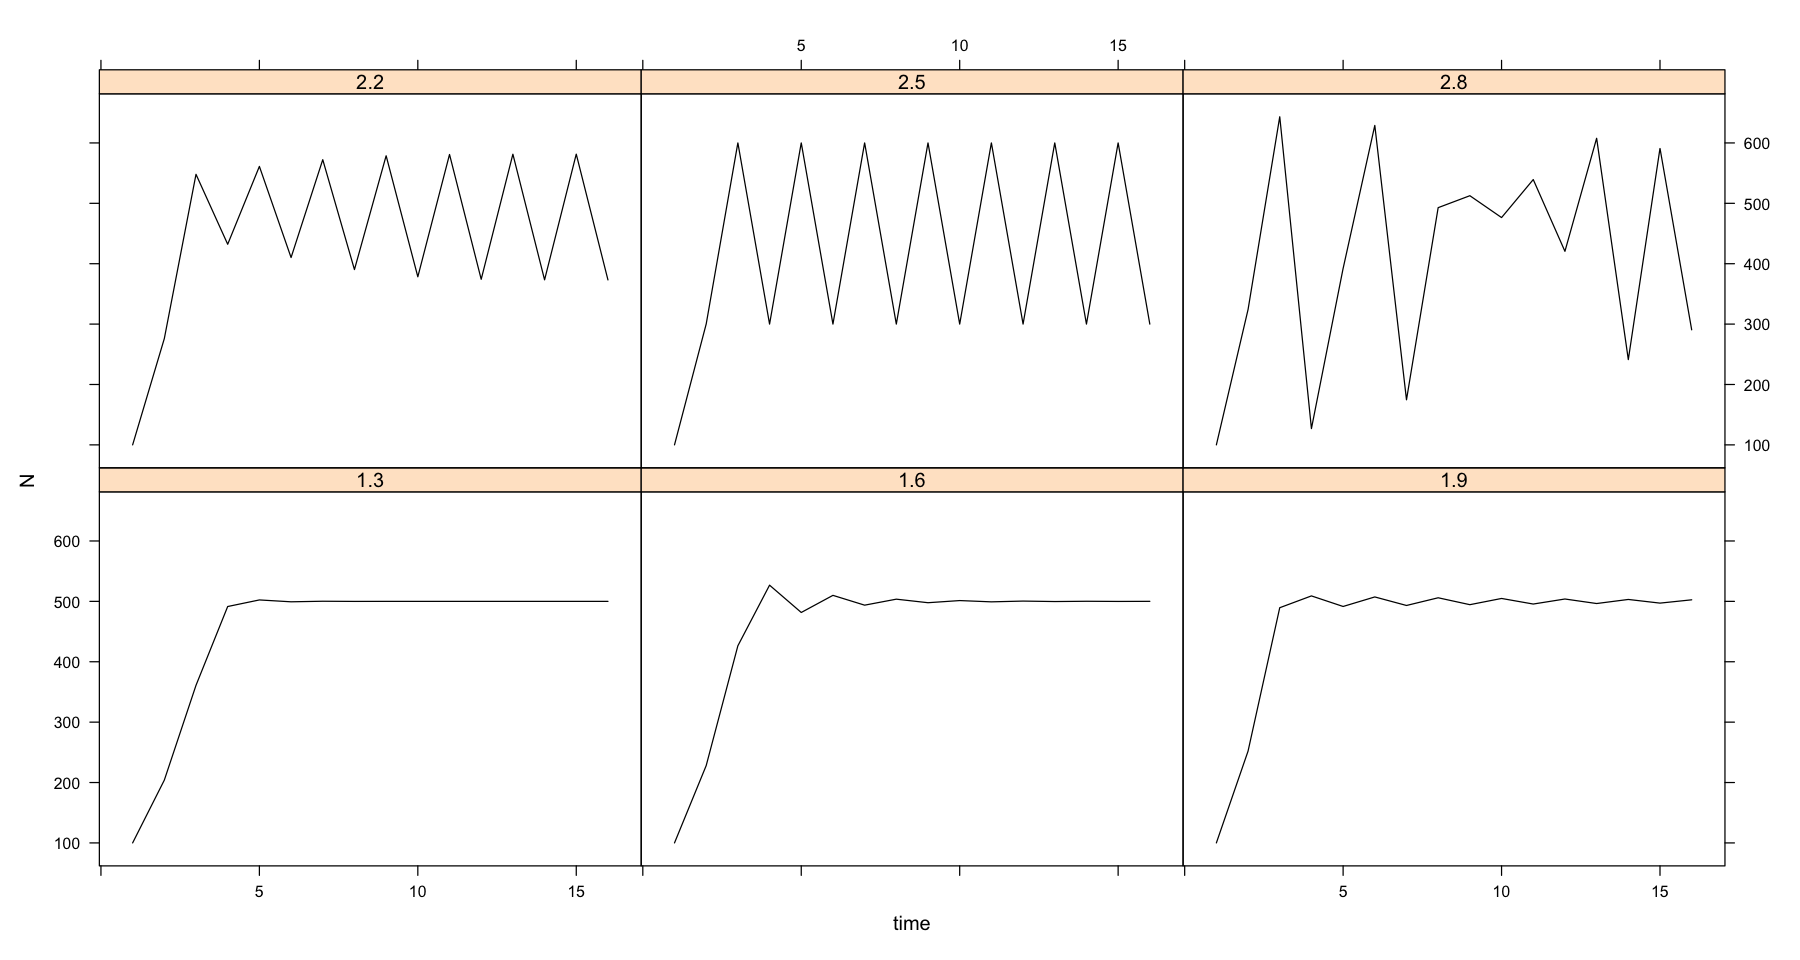

In [29]:
tmp <- data.frame(rd = as.factor(rds), t(data))
Ns2 <- reshape(tmp, varying = list(2:ncol(tmp)), idvar = "rd", v.names = "N", direction = "long")
library(lattice)
print(xyplot(N ~ time | rd, data = Ns2, type = "l", layout = c(3, 2, 1), col = 1))

### Continuous density dependent growth

The eqution for the density independent growth is $N_{t+1} = N_{0}e^{rt}$. if we differentiate with respect to t we get $\frac{dN}{dt} = \frac {dN_{0}(e^r)^t}{dt} = N_{0}\ln{e^r} = rN_{0}$. 
If we include a scaling factor to add dependency between population count and growth, we can rewrite the model formula with $N_{t} = rN(\frac{K-N}{N})$

For the exponential growth, we just divide by a scaling factor that takes into consideration the current population count. 
$N_{t+1} = \frac{N_{0}e^{rt}}{1+\alpha N_{0}(e^{rt} - 1)}$. When $N_{0}$ is small, or t=0 the scaling factor is 1, so the population just grows exponentially.